# Credit Card Fraud Detection (PyCaret)
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

In [3]:
# import data analysis libraries
import pandas as pd
import numpy as np
# Explains the output of any machine learning model
import shap

In [4]:
#  Load credit card fraud detection dataset
df=pd.read_csv(r'C:\Users\chara\Desktop\Data_sets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check the shape of data
df.shape 

(284807, 31)

In [6]:
# Class column has two values '0'(non-fradulent) and '1'(fradulent)
# count of 0 in the Class column
len(df[df['Class']==0])

284315

In [7]:
# count of 1 in the Class column
len(df[df['Class']==1])


492

### 284315 entries for class=0 and 492 entires for class=1 ,based on these statistics it is clearly an imbalance dataset 


# Setting up Environment in PyCaret



In [8]:
# pip install pycaret
from pycaret.classification import *
# Select target vairable
clf1 = setup(data = df, target = 'Class')
# Initiallize the data and fuctioning : Once initialize press 'Y'

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3980
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparing All Models

In [9]:
# Output prints a score grid that shows Accuracy, Recall, Precision, F1 and Kappa by fold.  
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.999600,0.973600,0.780700,0.959100,0.858700,0.858500
1,Extra Trees Classifier,0.999500,0.942000,0.760000,0.944800,0.839900,0.839700
2,Extreme Gradient Boosting,0.999500,0.974300,0.780800,0.921800,0.840900,0.840600
3,Random Forest Classifier,0.999400,0.927200,0.730700,0.929400,0.815500,0.815200
4,Linear Discriminant Analysis,0.999400,0.980000,0.755800,0.878400,0.809600,0.809300
5,Ada Boost Classifier,0.999100,0.972000,0.664500,0.789800,0.717400,0.717000
6,Logistic Regression,0.999000,0.902900,0.655800,0.729500,0.686400,0.685900
7,Decision Tree Classifier,0.999000,0.866900,0.734300,0.691300,0.708300,0.707800
8,Ridge Classifier,0.998800,0.000000,0.365300,0.853100,0.502800,0.502300
9,Gradient Boosting Classifier,0.998500,0.481200,0.319300,0.653100,0.420000,0.419400


## CatBoost Classifier

In [10]:
# Creating a catboost classifier based on the highest precision, F1 and kappa values.
catboost=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9994,0.9586,0.7083,0.9444,0.8095,0.8092
1,0.9994,0.9393,0.7083,0.9444,0.8095,0.8092
2,0.9996,0.9909,0.8333,0.9524,0.8889,0.8887
3,0.9994,0.9451,0.6400,1.0000,0.7805,0.7802
4,0.9996,0.9659,0.8333,0.9524,0.8889,0.8887
5,0.9994,0.9715,0.7083,0.8947,0.7907,0.7904
6,0.9998,0.9986,0.8750,1.0000,0.9333,0.9332
7,0.9996,0.9819,0.8333,0.9524,0.8889,0.8887
8,0.9998,0.9990,0.8750,1.0000,0.9333,0.9332
9,0.9996,0.9850,0.7917,0.9500,0.8636,0.8634


## Tune CatBoost Model
* Automatically tunes the hyperparameters of a model 

In [11]:
tuned_catboost=tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9994,0.9508,0.6667,0.9412,0.7805,0.7802
1,0.9995,0.9491,0.7500,0.9474,0.8372,0.8370
2,0.9995,0.9879,0.8333,0.8696,0.8511,0.8508
3,0.9994,0.9453,0.7200,0.9474,0.8182,0.8179
4,0.9996,0.9695,0.7917,1.0000,0.8837,0.8835
5,0.9993,0.9320,0.7083,0.8500,0.7727,0.7724
6,0.9998,0.9988,0.8750,1.0000,0.9333,0.9332
7,0.9995,0.9819,0.8333,0.8696,0.8511,0.8508
8,0.9996,0.9614,0.8333,0.9091,0.8696,0.8694
9,0.9996,0.9867,0.7917,0.9500,0.8636,0.8634


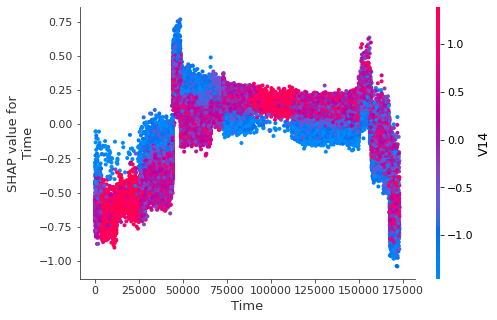

In [12]:
interpret_model(catboost, plot='correlation')

### Creating xgboost model

In [13]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9994,0.9765,0.6667,0.9412,0.7805,0.7802
1,0.9994,0.9428,0.7083,0.8947,0.7907,0.7904
2,0.9995,0.9799,0.8750,0.8400,0.8571,0.8569
3,0.9993,0.9581,0.6000,1.0000,0.7500,0.7497
4,0.9996,0.9604,0.8333,0.9524,0.8889,0.8887
5,0.9994,0.9773,0.7500,0.8571,0.8000,0.7997
6,0.9998,0.9994,0.8750,1.0000,0.9333,0.9332
7,0.9995,0.9651,0.8333,0.8696,0.8511,0.8508
8,0.9996,0.9973,0.8750,0.9130,0.8936,0.8934
9,0.9996,0.9858,0.7917,0.9500,0.8636,0.8634


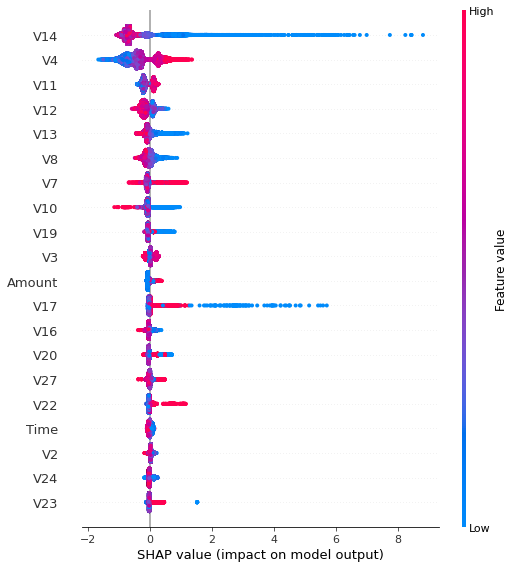

In [14]:
# Interpreting model
interpret_model(xgboost)

In [15]:
# predict on hold-out
pred_holdout = predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9995,0.9843,0.767,0.9405,0.8449,0.8447


### Shows all  possible evaluation metrics. Select each of them to explore in detail

In [16]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Prediction on test / hold-out Sample

In [17]:
predict_model(tuned_catboost);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9995,0.9558,0.7767,0.9524,0.8556,0.8554


# Got highest precision: 95%, F1: 85% and Kappa value: 85%

## Finalize Model for Deployment

In [ ]:
final_catboost = finalize_model(tuned_catboost)

In [19]:
#Final CatBoost model parameters for deployment
print(final_catboost)

## Saving the model

In [21]:
save_model(final_catboost,'Final catboost Model')

Transformation Pipeline and Model Succesfully Saved
